## Importing the large instance B1

In [2]:
import pandas as pd

data_b1 = pd.read_excel('Data\Instances\Large_Instances.xlsx', sheet_name='B1', index_col=0)
data_b1.head()

,X,Y,demand,lsp,designation
Number,,,,,
1,14.341022,10.221396,0,1.0,d
2,49.281272,40.161319,0,2.0,d
3,14.532059,18.241839,0,1.0,s
4,40.264580,30.524851,0,2.0,s
5,15.868504,37.159370,0,1.0,s


In [31]:
# all different points separated
satellites  = data_b1[data_b1['designation'] == 's'].copy()
customers   = data_b1[data_b1['designation'] == 'c'].copy()
depots       = data_b1[data_b1['designation'] == 'd'].copy()
collaboration_points = data_b1[data_b1['designation'] == 'z'].copy()

## Algorithm 1 
**Phase A** - An improved greedy algorithm for allocation and balancing

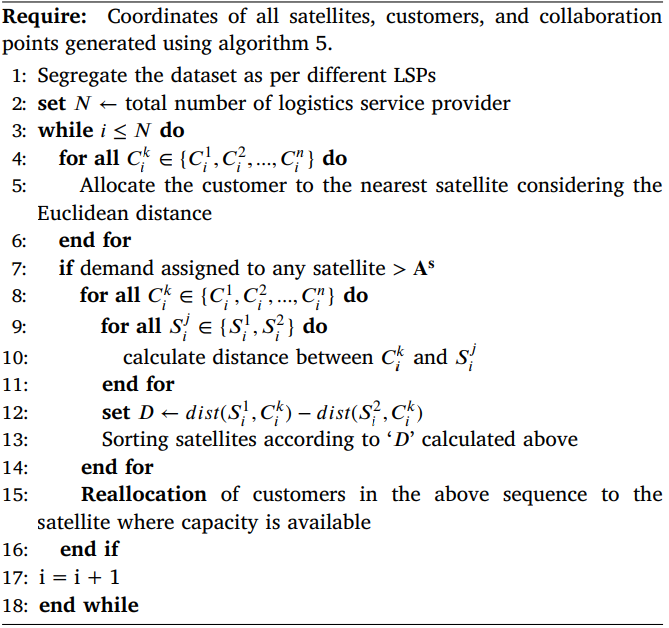

In [32]:
# Euclidean distance
def euclidean_distance(x1, y1, x2, y2):
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5

In [ ]:
def algorithm_1(satellites, customers, collaboration_points):
    sat = satellites.copy()
    cust = customers.copy()
    collab_pts = collaboration_points.copy()

    # Segregate the dataset as per different LSPs
    lsp = sat['lsp'].unique()
    for i in lsp:
        sat_lsp = sat[sat['lsp'] == i]
        cust_lsp = cust[cust['lsp'] == i]
        collab_pts_lsp = collab_pts[collab_pts['lsp'] == i]

        # Allocate the customer to the nearest satellite considering the Euclidean distance
        for customer in cust[i]:
            distances = [euclidean_distance(customer, satellite) for satellite in sat[i]]
            nearest_satellite = np.argmin(distances)
            sat[i][nearest_satellite].append(customer)



- Assumption: The LSP name is integer and continuous from 1 to n
- $A^s$ = 3

In [29]:
# Segregate the dataset as per different LSPs
segregated_data = {}
for i in data_b1['lsp'].unique():
    if not pd.isnull(i):
        # print('LSP:', i)
        segregated_data[i] = data_b1[data_b1['lsp'] == i]

i = 1

# data for current LSP
current_data = segregated_data[i]

current_customers = current_data[current_data['designation'] == 'c'].copy()
current_satellites = current_data[current_data['designation'] == 's'].copy()

#########
# clustered satellite allocation
# allocate current customers to nearest satellite considering the euclidean distance
cluster_satellite = []
for index_customer in current_customers.index:
    customer = current_customers.loc[index_customer]
    cluster_satellite.append(current_satellites.index[0] if euclidean_distance(customer['X'], customer['Y'], current_satellites.iloc[0]['X'], current_satellites.iloc[0]['Y']) < euclidean_distance(customer['X'], customer['Y'], current_satellites.iloc[1]['X'], current_satellites.iloc[1]['Y']) else current_satellites.index[1])

current_customers['clustered_satellite'] = cluster_satellite
#########

In [30]:
current_customers

,X,Y,demand,lsp,designation,clustered_satellite
Number,,,,,,
7,45.888292,34.666294,10,1.0,c,5
9,28.222402,32.773488,10,1.0,c,5
11,44.815629,27.955449,10,1.0,c,5
13,23.761131,30.514196,10,1.0,c,5
15,44.956729,23.648450,10,1.0,c,3
17,34.669742,24.783159,10,1.0,c,3
19,31.507600,22.496970,10,1.0,c,3
21,41.235026,13.659386,10,1.0,c,3
23,27.099845,41.221162,10,1.0,c,5


In [ ]:
def algorithm_1(data):
    data_modified = data.copy()

    # creating a list to store modified dataframes which we can merge later and return with the necesssary new columns
    lsp_specific_df = []

    # Parameters
    As = 3 # Satellite capacity

    # For clustered satellite allocation
    # satellites_all = data_modified[data_modified['designation'] == 's']
    # customers_all = data_modified[data_modified['designation'] == 'c']

    # Segregate the dataset as per different LSPs
    segregated_data = {}
    for i in data_modified['lsp'].unique():
        if not pd.isnull(i):
            # print('LSP:', i)
            segregated_data[i] = data_modified[data_modified['lsp'] == i]

    # total number of LSPs
    N = len(segregated_data)

    i = 1
    while i <= N:
        # data for current LSP
        current_data = segregated_data[i]

        current_customers = current_data[current_data['designation'] == 'c'].copy()
        current_satellites = current_data[current_data['designation'] == 's'].copy()

        #########
        # origin satellite allocation
        # allocate current customers to nearest satellite considering the euclidean distance
        origin_satellite = []
        for index_customer in current_customers.index:
            customer = current_customers.loc[index_customer]
            origin_satellite.append(current_satellites.index[0] if euclidean_distance(customer['X'], customer['Y'], current_satellites.iloc[0]['X'], current_satellites.iloc[0]['Y']) < euclidean_distance(customer['X'], customer['Y'], current_satellites.iloc[1]['X'], current_satellites.iloc[1]['Y']) else current_satellites.index[1])

        current_customers['origin_satellite'] = origin_satellite
        #########




        #########
        # if demand assigned to any satellite > As:
        for index_satellite in current_satellites.index:
            satellite = current_satellites.loc[index_satellite]
            demand = current_customers[current_customers['clustered_satellite'] == index_satellite].shape[0]
            if demand > As:
                print('Satellite:', index_satellite, 'Demand:', demand)      
                
                  


        if demand assigned to any satellite > As:
            for all customers for lsp i :
                for all satellities :
                    # calculate distance between customer and satellite
                
                D = dist(S1, Ck) - dist(S2, Ck)
                # sortinf satelites according to D calculated above

            # reallocation of customers in the above sequence to the satellite where capacity is available



        
        lsp_specific_df.append(current_customers)
        i += 1